In [1]:
import pandas as pd

In [ ]:
EFFR = pd.read_csv("FEDFUNDS.csv", sep=",", )
FFF = pd.read_csv("Federal_Fund_Future.csv", sep=";")

# Convertir les colonnes en type date
EFFR['observation_date'] = pd.to_datetime(EFFR['observation_date'])  
FFF['Date'] = pd.to_datetime(FFF['Date'])    # Remplace 'date' par le nom de la colonne appropriée

print(EFFR.head())
print(EFFR.info())
print(FFF.head())
print(FFF.info())


  observation_date  FEDFUNDS
0       2003-01-01      1.24
1       2003-02-01      1.26
2       2003-03-01      1.25
3       2003-04-01      1.26
4       2003-05-01      1.26
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   observation_date  273 non-null    datetime64[ns]
 1   FEDFUNDS          273 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.4 KB
None
        Date   Price     Open     High      Low     Vol. Change %
0 2025-10-01  95.910  95.9225  95.9225  95.9075    1.44M    0.14%
1 2025-09-01  95.775  95.7675  95.7950  95.7650    2.46M    0.11%
2 2025-08-01  95.670  95.6750  95.6825  95.6675    1.28M    0.00%
3 2025-07-01  95.670  95.6700  95.6725  95.6675    1.01M    0.00%
4 2025-06-01  95.670  95.6725  95.6750  95.6700  696.84K    0.00%
<class 'pandas.core.frame.DataFrame'>
RangeInd

In [14]:
FFF = FFF.drop(columns=['Open', 'High', 'Low', 'Vol.', 'Change %'], errors='ignore')
FFF['implicite_fund_rate'] = 100 - FFF['Price']

print(EFFR.dtypes)
print(FFF.dtypes)




observation_date    datetime64[ns]
FEDFUNDS                   float64
dtype: object
Date                   datetime64[ns]
Price                         float64
implicite_fund_rate           float64
dtype: object


In [19]:
display(EFFR)
display(FFF)

,observation_date,FEDFUNDS
0,2003-01-01,1.24
1,2003-02-01,1.26
2,2003-03-01,1.25
3,2003-04-01,1.26
4,2003-05-01,1.26
...,...,...
268,2025-05-01,4.33
269,2025-06-01,4.33
270,2025-07-01,4.33
271,2025-08-01,4.33


,Date,Price,implicite_fund_rate
0,2025-10-01,95.910,4.090
1,2025-09-01,95.775,4.225
2,2025-08-01,95.670,4.330
3,2025-07-01,95.670,4.330
4,2025-06-01,95.670,4.330
...,...,...,...
269,2003-05-01,98.750,1.250
270,2003-04-01,98.750,1.250
271,2003-03-01,98.750,1.250
272,2003-02-01,98.740,1.260


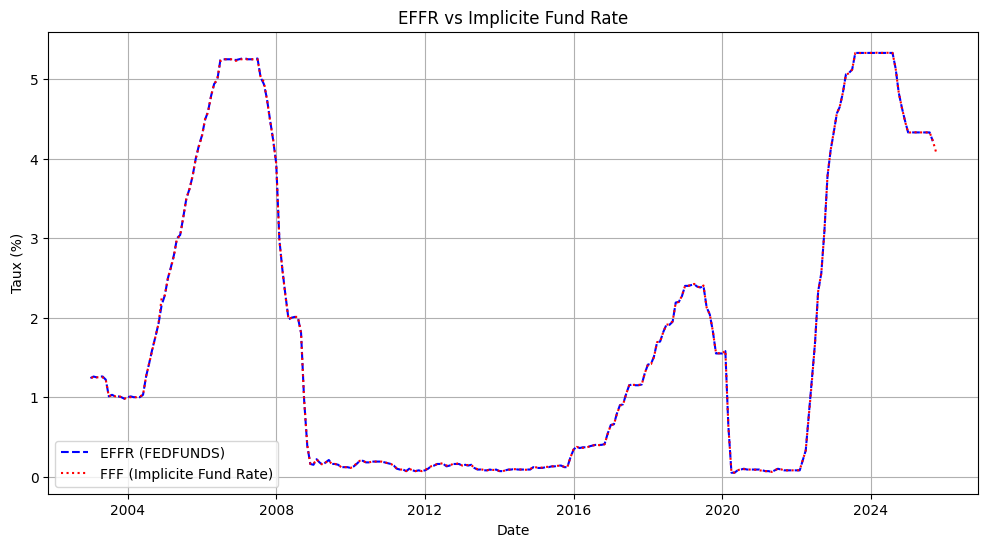

In [26]:
# tracer les series temporelles des deux datasets (implicite_fund_rate et FEDFUNDS ) superposer sur la meme figure``
import matplotlib.pyplot as plt

# ...existing code...

plt.figure(figsize=(12, 6))

# Tracer la première série avec une couleur et un style de ligne
plt.plot(EFFR['observation_date'], EFFR['FEDFUNDS'], label='EFFR (FEDFUNDS)', color='blue', linestyle='--')

# Tracer la deuxième série avec une couleur différente et un style de ligne
plt.plot(FFF['Date'], FFF['implicite_fund_rate'], label='FFF (Implicite Fund Rate)', color='red', linestyle=':')

plt.xlabel('Date')
plt.ylabel('Taux (%)')
plt.title('EFFR vs Implicite Fund Rate')
plt.legend()
plt.grid()
plt.show()

# ...existing code...



,Date,implicite_fund_rate,observation_date,FEDFUNDS
0,2025-09-01,4.225,2025-09-01,4.22
1,2025-08-01,4.330,2025-08-01,4.33
2,2025-07-01,4.330,2025-07-01,4.33
3,2025-06-01,4.330,2025-06-01,4.33
4,2025-05-01,4.330,2025-05-01,4.33
...,...,...,...,...
268,2003-05-01,1.250,2003-05-01,1.26
269,2003-04-01,1.250,2003-04-01,1.26
270,2003-03-01,1.250,2003-03-01,1.25
271,2003-02-01,1.260,2003-02-01,1.26


,Date,implicite_fund_rate,observation_date,FEDFUNDS,difference
0,2025-09-01,4.225,2025-09-01,4.22,5.000000e-03
1,2025-08-01,4.330,2025-08-01,4.33,-1.776357e-15
2,2025-07-01,4.330,2025-07-01,4.33,-1.776357e-15
3,2025-06-01,4.330,2025-06-01,4.33,-1.776357e-15
4,2025-05-01,4.330,2025-05-01,4.33,-1.776357e-15
...,...,...,...,...,...
268,2003-05-01,1.250,2003-05-01,1.26,-1.000000e-02
269,2003-04-01,1.250,2003-04-01,1.26,-1.000000e-02
270,2003-03-01,1.250,2003-03-01,1.25,0.000000e+00
271,2003-02-01,1.260,2003-02-01,1.26,5.107026e-15


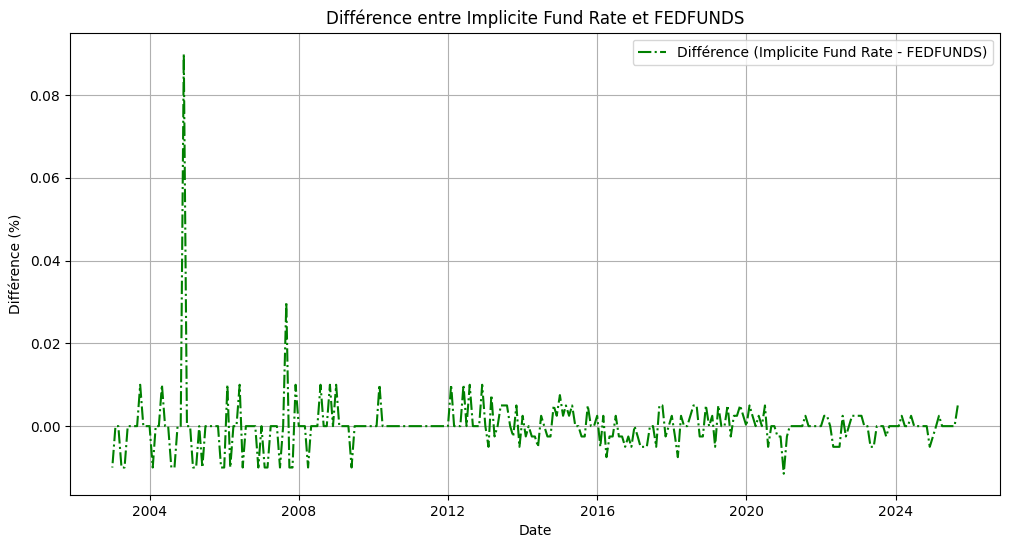

In [30]:
# ...existing code...

# Fusionner les DataFrames sur les dates
merged_df = pd.merge(FFF[['Date', 'implicite_fund_rate']], EFFR[['observation_date', 'FEDFUNDS']], 
                      left_on='Date', right_on='observation_date', how='inner')
display(merged_df)

# Calculer la différence
merged_df['difference'] = merged_df['implicite_fund_rate'] - merged_df['FEDFUNDS']

display(merged_df)

# Tracer la série de la différence sur une nouvelle figure
plt.figure(figsize=(12, 6))
plt.plot(merged_df['Date'], merged_df['difference'], label='Différence (Implicite Fund Rate - FEDFUNDS)', color='green', linestyle='-.')

plt.xlabel('Date')
plt.ylabel('Différence (%)')
plt.title('Différence entre Implicite Fund Rate et FEDFUNDS')
plt.legend()
plt.grid()
plt.show()

# ...existing code...

Mean Squared Error: 0.017131485869960203
R^2 Score: 0.9952501003356243
Coefficient implicite_fund_rate_lag_1: 1.5923267480620367
Coefficient implicite_fund_rate_lag_2: -0.7345468289560657
Coefficient implicite_fund_rate_lag_3: 0.2864071005741317
Coefficient implicite_fund_rate_lag_4: -0.24977167218097035
Coefficient implicite_fund_rate_lag_5: 0.2936260409943649
Coefficient implicite_fund_rate_lag_6: -0.1995479189814466
Intercept: 0.008291339298881928


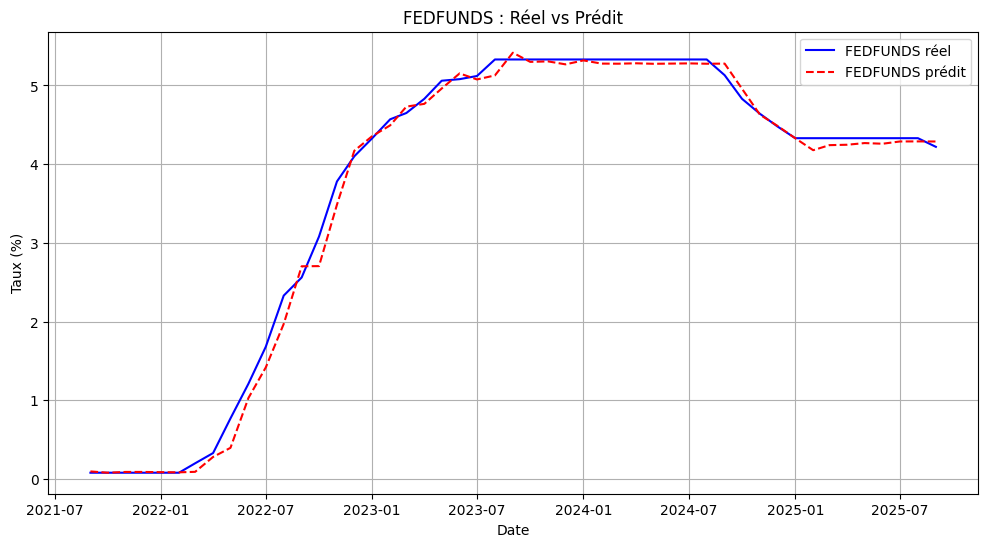

In [37]:
# Créer les features décalées (lag features)
n_lags = 6  # nombre de mois précédents à utiliser
merged_df = merged_df.sort_values('Date')  # Trier par date

# Créer les colonnes décalées
for i in range(1, n_lags + 1):
    merged_df[f'implicite_fund_rate_lag_{i}'] = merged_df['implicite_fund_rate'].shift(i)

# Supprimer les lignes avec des valeurs manquantes (début de série)
merged_df = merged_df.dropna()

# Séparer les caractéristiques (X) et la cible (y)
lag_columns = [f'implicite_fund_rate_lag_{i}' for i in range(1, n_lags + 1 )]
X = merged_df[lag_columns]
y = merged_df['FEDFUNDS']

# Diviser les données en ensembles d'entraînement et de test
# On garde les dernières 20% des données pour le test (plus réaliste temporellement)
split_idx = int(len(merged_df) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Créer et entraîner le modèle
model = LinearRegression()
model.fit(X_train, y_train)

# Prédire et évaluer
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Afficher les coefficients pour chaque lag
for lag, coef in zip(lag_columns, model.coef_):
    print(f'Coefficient {lag}: {coef}')
print(f'Intercept: {model.intercept_}')

# Visualiser les prédictions
plt.figure(figsize=(12, 6))
plt.plot(merged_df['Date'].iloc[split_idx:], y_test, label='FEDFUNDS réel', color='blue')
plt.plot(merged_df['Date'].iloc[split_idx:], y_pred, label='FEDFUNDS prédit', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Taux (%)')
plt.title('FEDFUNDS : Réel vs Prédit')
plt.legend()
plt.grid(True)
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.47      0.52        30
           1       0.33      0.44      0.38        18

    accuracy                           0.46        48
   macro avg       0.46      0.46      0.45        48
weighted avg       0.49      0.46      0.47        48


Confusion Matrix:
[[14 16]
 [10  8]]


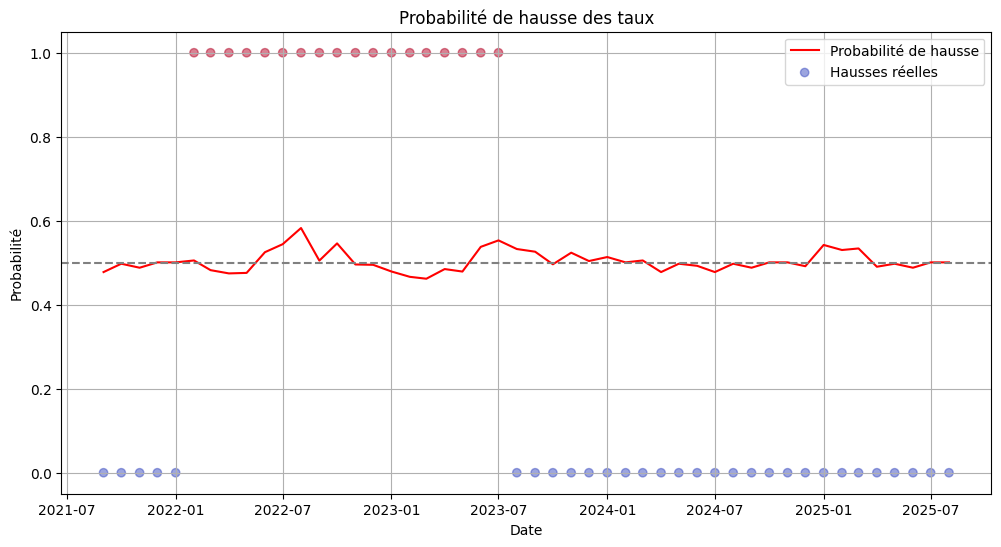


Importance des features:
        feature  importance
1  spread_lag_1    0.181245
3  spread_lag_3    0.099903
0        spread    0.035866
2  spread_lag_2    0.025183


In [38]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Calculer la variation du taux FEDFUNDS
merged_df['FEDFUNDS_change'] = merged_df['FEDFUNDS'].diff().shift(-1)  # variation au prochain pas de temps
merged_df['target'] = (merged_df['FEDFUNDS_change'] > 0).astype(int)  # 1 si hausse, 0 sinon

# Calculer le spread
merged_df['spread'] = merged_df['implicite_fund_rate'] - merged_df['FEDFUNDS']

# Créer features avec spread et lags
n_lags = 3
for i in range(1, n_lags + 1):
    merged_df[f'spread_lag_{i}'] = merged_df['spread'].shift(i)

# Nettoyer données
merged_df = merged_df.dropna()

# Features
feature_columns = ['spread'] + [f'spread_lag_{i}' for i in range(1, n_lags + 1)]
X = merged_df[feature_columns]
y = merged_df['target']

# Split temporel
split_idx = int(len(merged_df) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Standardiser
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modèle
clf = LogisticRegression(random_state=42, class_weight='balanced')
clf.fit(X_train_scaled, y_train)

# Prédictions
y_pred = clf.predict(X_test_scaled)
y_proba = clf.predict_proba(X_test_scaled)[:, 1]

# Évaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Visualiser probabilités prédites
plt.figure(figsize=(12, 6))
plt.plot(merged_df['Date'].iloc[split_idx:], y_proba, label='Probabilité de hausse', color='red')
plt.axhline(y=0.5, color='gray', linestyle='--')
plt.scatter(merged_df['Date'].iloc[split_idx:], y_test, 
           c=y_test, cmap='coolwarm', label='Hausses réelles', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Probabilité')
plt.title('Probabilité de hausse des taux')
plt.legend()
plt.grid(True)
plt.show()

# Importance des features
importances = pd.DataFrame({
    'feature': feature_columns,
    'importance': np.abs(clf.coef_[0])
})
importances = importances.sort_values('importance', ascending=False)
print("\nImportance des features:")
print(importances)

In [39]:
display(merged_df)

,Date,implicite_fund_rate,observation_date,FEDFUNDS,implicite_fund_rate_lag_1,implicite_fund_rate_lag_2,implicite_fund_rate_lag_3,implicite_fund_rate_lag_4,implicite_fund_rate_lag_5,implicite_fund_rate_lag_6,implicite_fund_rate_lag_7,implicite_fund_rate_lag_8,implicite_fund_rate_lag_9,implicite_fund_rate_lag_10,FEDFUNDS_change,target,spread,spread_lag_1,spread_lag_2,spread_lag_3
237,2005-12-01,4.15,2005-12-01,4.16,4.0000,3.7800,3.6200,3.5000,3.2600,3.0300,3.0000,2.780,2.62,2.5000,0.13,1,-1.000000e-02,0.000000e+00,1.332268e-15,4.440892e-15
236,2006-01-01,4.28,2006-01-01,4.29,4.1500,4.0000,3.7800,3.6200,3.5000,3.2600,3.0300,3.000,2.78,2.6200,0.20,1,-1.000000e-02,-1.000000e-02,0.000000e+00,1.332268e-15
235,2006-02-01,4.50,2006-02-01,4.49,4.2800,4.1500,4.0000,3.7800,3.6200,3.5000,3.2600,3.030,3.00,2.7800,0.10,1,1.000000e-02,-1.000000e-02,-1.000000e-02,0.000000e+00
234,2006-03-01,4.58,2006-03-01,4.59,4.5000,4.2800,4.1500,4.0000,3.7800,3.6200,3.5000,3.260,3.03,3.0000,0.20,1,-1.000000e-02,1.000000e-02,-1.000000e-02,-1.000000e-02
233,2006-04-01,4.79,2006-04-01,4.79,4.5800,4.5000,4.2800,4.1500,4.0000,3.7800,3.6200,3.500,3.26,3.0300,0.15,1,6.217249e-15,-1.000000e-02,1.000000e-02,-1.000000e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,2025-04-01,4.33,2025-04-01,4.33,4.3325,4.3300,4.3275,4.4750,4.6400,4.8300,5.1300,5.330,5.33,5.3325,0.00,0,-1.776357e-15,2.500000e-03,-1.776357e-15,-2.500000e-03
4,2025-05-01,4.33,2025-05-01,4.33,4.3300,4.3325,4.3300,4.3275,4.4750,4.6400,4.8300,5.130,5.33,5.3300,0.00,0,-1.776357e-15,-1.776357e-15,2.500000e-03,-1.776357e-15
3,2025-06-01,4.33,2025-06-01,4.33,4.3300,4.3300,4.3325,4.3300,4.3275,4.4750,4.6400,4.830,5.13,5.3300,0.00,0,-1.776357e-15,-1.776357e-15,-1.776357e-15,2.500000e-03
2,2025-07-01,4.33,2025-07-01,4.33,4.3300,4.3300,4.3300,4.3325,4.3300,4.3275,4.4750,4.640,4.83,5.1300,0.00,0,-1.776357e-15,-1.776357e-15,-1.776357e-15,-1.776357e-15


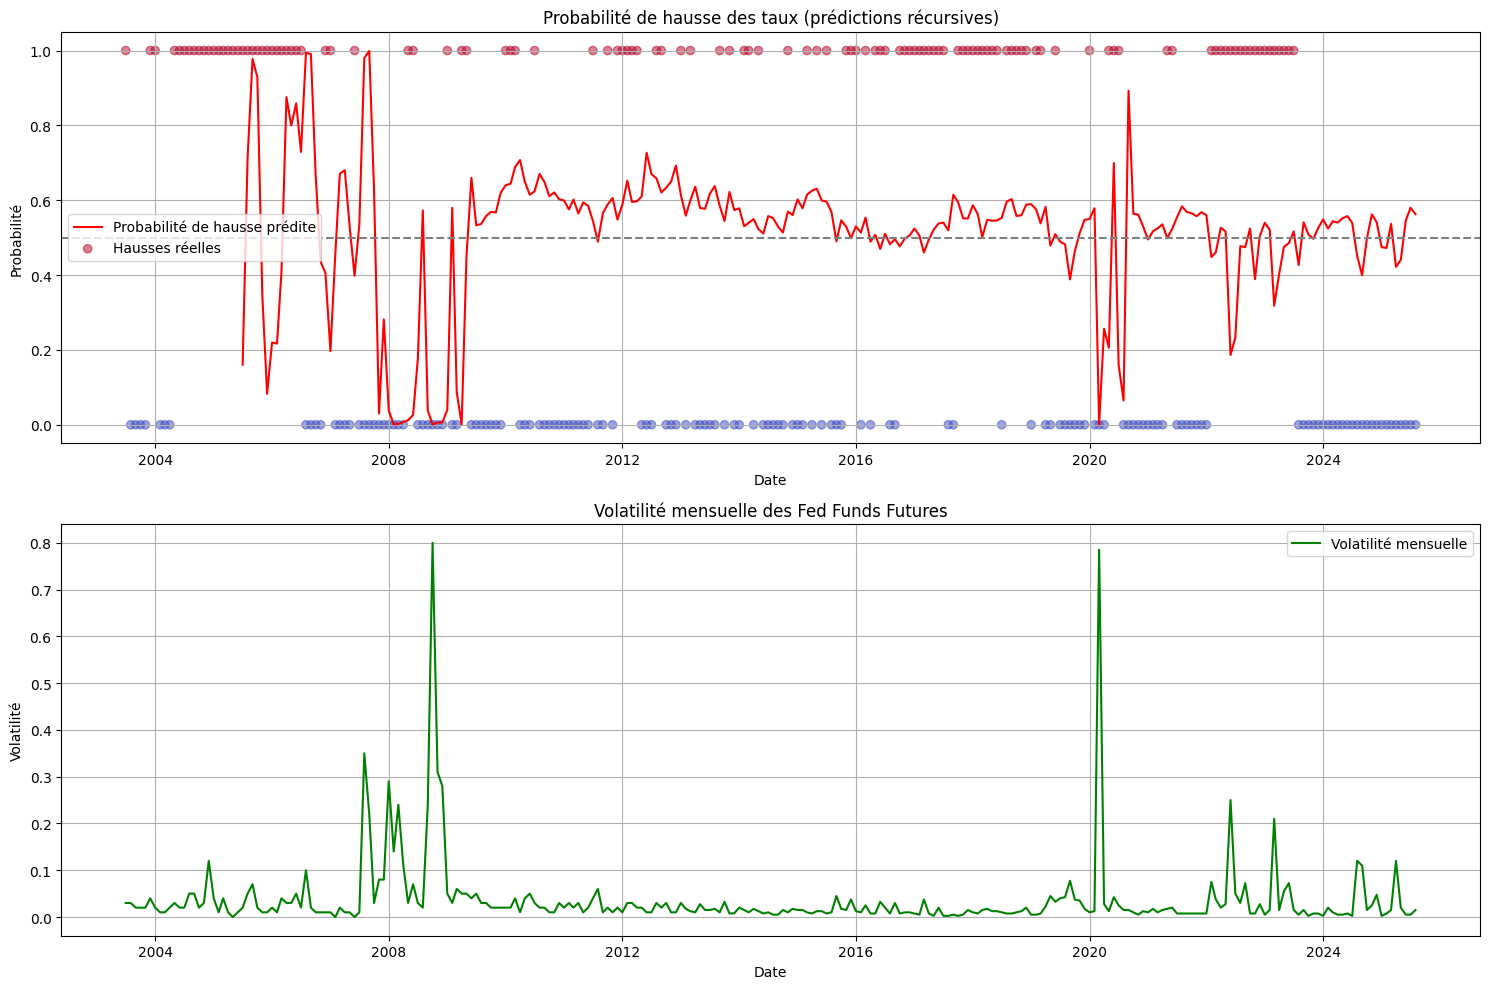


Rapport de classification sur toute la période:
              precision    recall  f1-score   support

           0       0.52      0.27      0.35       139
           1       0.40      0.67      0.50       103

    accuracy                           0.44       242
   macro avg       0.46      0.47      0.43       242
weighted avg       0.47      0.44      0.42       242



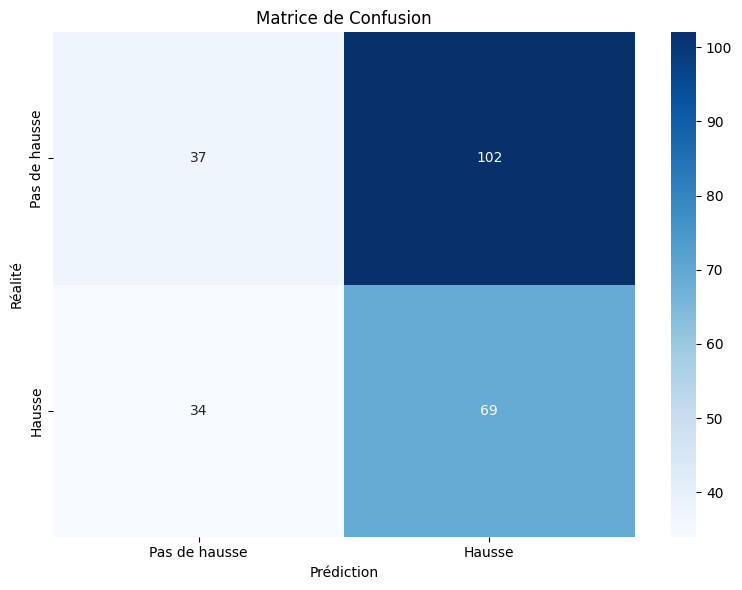


Importance des features:
               feature  importance
1   monthly_volatility    0.285989
12    volatility_lag_5    0.210089
8     volatility_lag_1    0.174923
0               spread    0.103792
11    volatility_lag_4    0.088718
10    volatility_lag_3    0.079866
5         spread_lag_4    0.067781
3         spread_lag_2    0.065129
7         spread_lag_6    0.035787
4         spread_lag_3    0.026426
9     volatility_lag_2    0.025393
13    volatility_lag_6    0.023533
6         spread_lag_5    0.022822
2         spread_lag_1    0.001700


In [46]:
# 1. Imports nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# 2. Chargement des données
EFFR = pd.read_csv("FEDFUNDS.csv", sep=",")
FFF = pd.read_csv("Federal_Fund_Future.csv", sep=";")

# Conversion des dates
EFFR['observation_date'] = pd.to_datetime(EFFR['observation_date'])
FFF['Date'] = pd.to_datetime(FFF['Date'])

# 3. Préparation des features
# Calcul des taux implicites
FFF['implicite_fund_rate'] = 100 - FFF['Price']
FFF['implicite_fund_rate_high'] = 100 - FFF['Low']
FFF['implicite_fund_rate_low'] = 100 - FFF['High']
FFF['monthly_volatility'] = FFF['implicite_fund_rate_high'] - FFF['implicite_fund_rate_low']

# 4. Fusion des données
merged_df = pd.merge(
    FFF[['Date', 'implicite_fund_rate', 'monthly_volatility']], 
    EFFR[['observation_date', 'FEDFUNDS']], 
    left_on='Date', right_on='observation_date', 
    how='inner'
)

# 5. Création des features
merged_df = merged_df.sort_values('Date')
merged_df['spread'] = merged_df['implicite_fund_rate'] - merged_df['FEDFUNDS']
merged_df['FEDFUNDS_change'] = merged_df['FEDFUNDS'].diff().shift(-1)
merged_df['target'] = (merged_df['FEDFUNDS_change'] > 0).astype(int)

# Création des lags
n_lags = 6
for i in range(1, n_lags + 1):
    merged_df[f'spread_lag_{i}'] = merged_df['spread'].shift(i)
    merged_df[f'volatility_lag_{i}'] = merged_df['monthly_volatility'].shift(i)

# Nettoyage des données
merged_df = merged_df.dropna()

# 6. Définition des features
feature_columns = ['spread', 'monthly_volatility'] + \
                 [f'spread_lag_{i}' for i in range(1, n_lags + 1)] + \
                 [f'volatility_lag_{i}' for i in range(1, n_lags + 1)]

# 7. Fonction pour créer les features
def create_features(data, current_date):
    mask = data['Date'] <= current_date
    X = data.loc[mask, feature_columns].copy()
    y = data.loc[mask, 'target'].copy()
    return X, y

# 8. Prédictions récursives
dates = merged_df['Date'].sort_values().unique()
all_predictions = []
all_probabilities = []

initial_train_size = 24
scaler = StandardScaler()
clf = LogisticRegression(random_state=42, class_weight='balanced')

for i in range(initial_train_size, len(dates)):
    current_date = dates[i-1]
    prediction_date = dates[i]
    
    X_train, y_train = create_features(merged_df, current_date)
    X_train_scaled = scaler.fit_transform(X_train)
    clf.fit(X_train_scaled, y_train)
    
    X_test = merged_df.loc[merged_df['Date'] == prediction_date, feature_columns]
    X_test_scaled = scaler.transform(X_test)
    
    pred = clf.predict(X_test_scaled)
    prob = clf.predict_proba(X_test_scaled)[:, 1]
    
    all_predictions.append(pred[0])
    all_probabilities.append(prob[0])

# 9. Ajout des prédictions au DataFrame
prediction_dates = dates[initial_train_size:]
merged_df['predicted_prob'] = np.nan
merged_df['predicted_target'] = np.nan
merged_df.loc[merged_df['Date'].isin(prediction_dates), 'predicted_prob'] = all_probabilities
merged_df.loc[merged_df['Date'].isin(prediction_dates), 'predicted_target'] = all_predictions

# 10. Visualisations
plt.figure(figsize=(15, 10))

# Probabilités de hausse
plt.subplot(2, 1, 1)
plt.plot(merged_df['Date'], merged_df['predicted_prob'], 
         label='Probabilité de hausse prédite', color='red')
plt.scatter(merged_df['Date'], merged_df['target'], 
           c=merged_df['target'], cmap='coolwarm', 
           label='Hausses réelles', alpha=0.5)
plt.axhline(y=0.5, color='gray', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Probabilité')
plt.title('Probabilité de hausse des taux (prédictions récursives)')
plt.legend()
plt.grid(True)

# Volatilité
plt.subplot(2, 1, 2)
plt.plot(merged_df['Date'], merged_df['monthly_volatility'], 
         label='Volatilité mensuelle', color='green')
plt.xlabel('Date')
plt.ylabel('Volatilité')
plt.title('Volatilité mensuelle des Fed Funds Futures')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 11. Évaluation
y_true = merged_df.loc[merged_df['Date'].isin(prediction_dates), 'target']
y_pred = merged_df.loc[merged_df['Date'].isin(prediction_dates), 'predicted_target']

print("\nRapport de classification sur toute la période:")
print(classification_report(y_true, y_pred))

# Matrice de confusion
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pas de hausse', 'Hausse'],
            yticklabels=['Pas de hausse', 'Hausse'])
plt.title('Matrice de Confusion')
plt.xlabel('Prédiction')
plt.ylabel('Réalité')
plt.tight_layout()
plt.show()

# 12. Importance des features
importances = pd.DataFrame({
    'feature': feature_columns,
    'importance': np.abs(clf.coef_[0])
})
print("\nImportance des features:")
print(importances.sort_values('importance', ascending=False))


Classification report (sur les lignes historiques connues utilisées pour entraînement final) :
              precision    recall  f1-score   support

           0       0.60      0.38      0.46       147
           1       0.47      0.68      0.56       120

    accuracy                           0.52       267
   macro avg       0.53      0.53      0.51       267
weighted avg       0.54      0.52      0.51       267


Confusion matrix:
 [[56 91]
 [38 82]]


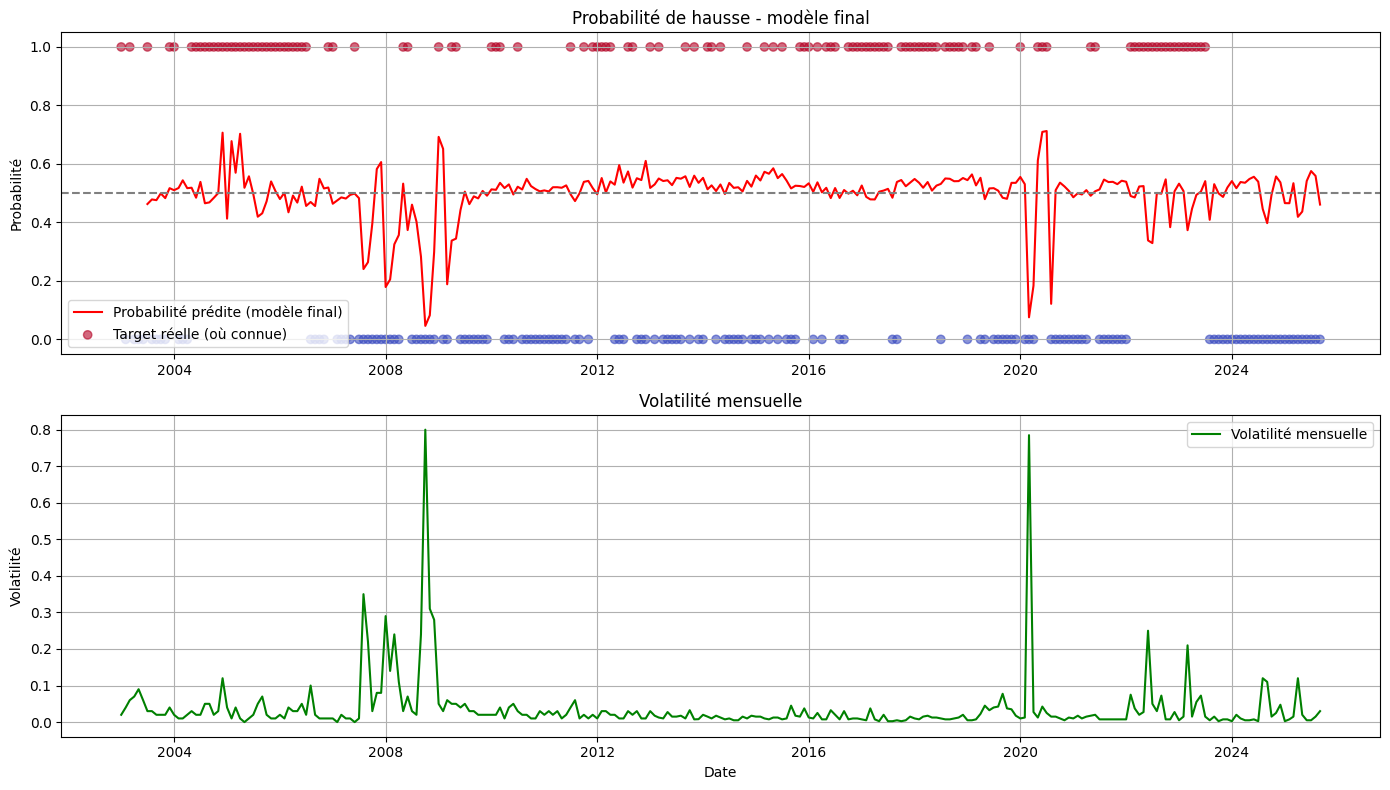

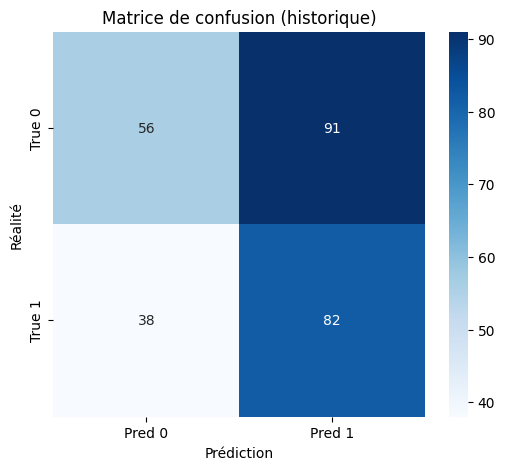


Importance (abs coef) :
               feature  importance
1   monthly_volatility    0.285598
12    volatility_lag_5    0.219248
8     volatility_lag_1    0.169500
0               spread    0.098995
10    volatility_lag_3    0.085105
11    volatility_lag_4    0.079781
5         spread_lag_4    0.067879
3         spread_lag_2    0.062893
7         spread_lag_6    0.032731
9     volatility_lag_2    0.030110
4         spread_lag_3    0.025986
6         spread_lag_5    0.020097
13    volatility_lag_6    0.014699
2         spread_lag_1    0.001446


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# 1) Chargement
EFFR = pd.read_csv("FEDFUNDS.csv", sep=",")
FFF = pd.read_csv("Federal_Fund_Future.csv", sep=";")

# 2) Dates
EFFR['observation_date'] = pd.to_datetime(EFFR['observation_date'])
FFF['Date'] = pd.to_datetime(FFF['Date'])

# 3) Features de base
# taux implicite
FFF['implicite_fund_rate'] = 100 - FFF['Price']

# volatilité mensuelle si High/Low disponibles
if {'High', 'Low'}.issubset(FFF.columns):
    FFF['implicite_fund_rate_high'] = 100 - FFF['Low']
    FFF['implicite_fund_rate_low'] = 100 - FFF['High']
    FFF['monthly_volatility'] = FFF['implicite_fund_rate_high'] - FFF['implicite_fund_rate_low']
else:
    FFF['monthly_volatility'] = 0.0

# 4) Fusion
merged_df = pd.merge(
    FFF[['Date', 'implicite_fund_rate', 'monthly_volatility']],
    EFFR[['observation_date', 'FEDFUNDS']],
    left_on='Date', right_on='observation_date', how='inner'
)
merged_df = merged_df.sort_values('Date').reset_index(drop=True)

# 5) Target (haussse prochaine période) — target will be NaN for the last row
merged_df['FEDFUNDS_next'] = merged_df['FEDFUNDS'].shift(-1)
merged_df['FEDFUNDS_change_next'] = merged_df['FEDFUNDS_next'] - merged_df['FEDFUNDS']
merged_df['target'] = (merged_df['FEDFUNDS_change_next'] > 0).astype(float)  # float so NaN remains for last

# 6) Lags (features)
n_lags = 6
merged_df['spread'] = merged_df['implicite_fund_rate'] - merged_df['FEDFUNDS']
for i in range(1, n_lags + 1):
    merged_df[f'spread_lag_{i}'] = merged_df['spread'].shift(i)
    merged_df[f'volatility_lag_{i}'] = merged_df['monthly_volatility'].shift(i)

# 7) Définir colonnes features
feature_columns = ['spread', 'monthly_volatility'] + \
                  [f'spread_lag_{i}' for i in range(1, n_lags + 1)] + \
                  [f'volatility_lag_{i}' for i in range(1, n_lags + 1)]

# 8) Préparer jeu d'entraînement final : utiliser toutes les lignes où target est connue
train_mask = merged_df['target'].notna() & merged_df[feature_columns].notna().all(axis=1)
X_train_final = merged_df.loc[train_mask, feature_columns].copy()
y_train_final = merged_df.loc[train_mask, 'target'].astype(int).copy()

# Sanity check
if X_train_final.empty:
    raise RuntimeError("Aucun enregistrement complet pour l'entraînement final (vérifier l'ordre / lags).")

# 9) Entraîner modèle final sur toute l'histoire disponible (sans la dernière ligne dont target est inconnue)
scaler_final = StandardScaler()
X_train_scaled = scaler_final.fit_transform(X_train_final)

clf_final = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
clf_final.fit(X_train_scaled, y_train_final)

# 10) Prédictions sur toutes les dates pour lesquelles les features sont connues
features_available_mask = merged_df[feature_columns].notna().all(axis=1)
X_all_features = merged_df.loc[features_available_mask, feature_columns].copy()
X_all_scaled = scaler_final.transform(X_all_features)

pred_proba_all = clf_final.predict_proba(X_all_scaled)[:, 1]
pred_all = clf_final.predict(X_all_scaled)

# Remettre dans merged_df
merged_df['final_pred_prob'] = np.nan
merged_df['final_pred_target'] = np.nan
merged_df.loc[features_available_mask, 'final_pred_prob'] = pred_proba_all
merged_df.loc[features_available_mask, 'final_pred_target'] = pred_all

# 11) Évaluation (sur les mêmes données historiques où target est connue)
eval_mask = train_mask  # lignes utilisées pour l'entraînement final (target connue)
y_true = merged_df.loc[eval_mask, 'target'].astype(int)
y_pred = merged_df.loc[eval_mask, 'final_pred_target'].astype(int)

print("\nClassification report (sur les lignes historiques connues utilisées pour entraînement final) :")
print(classification_report(y_true, y_pred))

conf_matrix = confusion_matrix(y_true, y_pred)
print("\nConfusion matrix:\n", conf_matrix)

# 12) Visualisations
plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
plt.plot(merged_df['Date'], merged_df['final_pred_prob'], label='Probabilité prédite (modèle final)', color='red')
plt.scatter(merged_df['Date'], merged_df['target'], c=merged_df['target'], cmap='coolwarm', label='Target réelle (où connue)', alpha=0.6)
plt.axhline(0.5, color='gray', linestyle='--')
plt.title('Probabilité de hausse - modèle final')
plt.ylabel('Probabilité')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(merged_df['Date'], merged_df['monthly_volatility'], label='Volatilité mensuelle', color='green')
plt.title('Volatilité mensuelle')
plt.ylabel('Volatilité')
plt.xlabel('Date')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred 0','Pred 1'], yticklabels=['True 0','True 1'])
plt.title('Matrice de confusion (historique)')
plt.xlabel('Prédiction')
plt.ylabel('Réalité')
plt.show()

# 13) Importance simple des features (coefficients)
importances = pd.DataFrame({
    'feature': feature_columns,
    'importance': np.abs(clf_final.coef_[0])
}).sort_values('importance', ascending=False)
print("\nImportance (abs coef) :")
print(importances)

# 14) Sauvegarde (optionnelle)
# merged_df.to_csv("merged_with_final_preds.csv", index=False)


Code A (haut) : fait des prédictions récursives walk-forward (rolling). À chaque date, il ré-entraîne sur le passé uniquement et prédit la prochaine. Évaluation hors-échantillon (réaliste).


Code B (bas) : entraîne une seule fois sur toute l’histoire connue (sauf la dernière ligne) puis prédit partout. L’évaluation est in-sample (optimiste).